In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('electricity.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [5]:
data['ForecastWindProduction'] = pd.to_numeric(data["ForecastWindProduction"], errors='coerce')
data['SystemLoadEA'] = pd.to_numeric(data['SystemLoadEA'], errors='coerce')
data['ORKTemperature'] = pd.to_numeric(data['ORKTemperature'], errors='coerce')
data['ORKWindspeed'] = pd.to_numeric(data['ORKWindspeed'], errors='coerce')
data['CO2Intensity'] = pd.to_numeric(data['CO2Intensity'], errors='coerce')
data['ActualWindProduction'] = pd.to_numeric(data['ActualWindProduction'], errors='coerce')
data['SystemLoadEP2'] = pd.to_numeric(data['SystemLoadEP2'], errors='coerce')
data['SMPEP2'] = pd.to_numeric(data['SMPEP2'], errors='coerce')

In [7]:
data.isnull().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       0
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [8]:
data = data.dropna()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37682 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                37682 non-null  object 
 1   Holiday                 37682 non-null  object 
 2   HolidayFlag             37682 non-null  int64  
 3   DayOfWeek               37682 non-null  int64  
 4   WeekOfYear              37682 non-null  int64  
 5   Day                     37682 non-null  int64  
 6   Month                   37682 non-null  int64  
 7   Year                    37682 non-null  int64  
 8   PeriodOfDay             37682 non-null  int64  
 9   ForecastWindProduction  37682 non-null  float64
 10  SystemLoadEA            37682 non-null  float64
 11  SMPEA                   37682 non-null  object 
 12  ORKTemperature          37682 non-null  float64
 13  ORKWindspeed            37682 non-null  float64
 14  CO2Intensity            37682 non-null

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

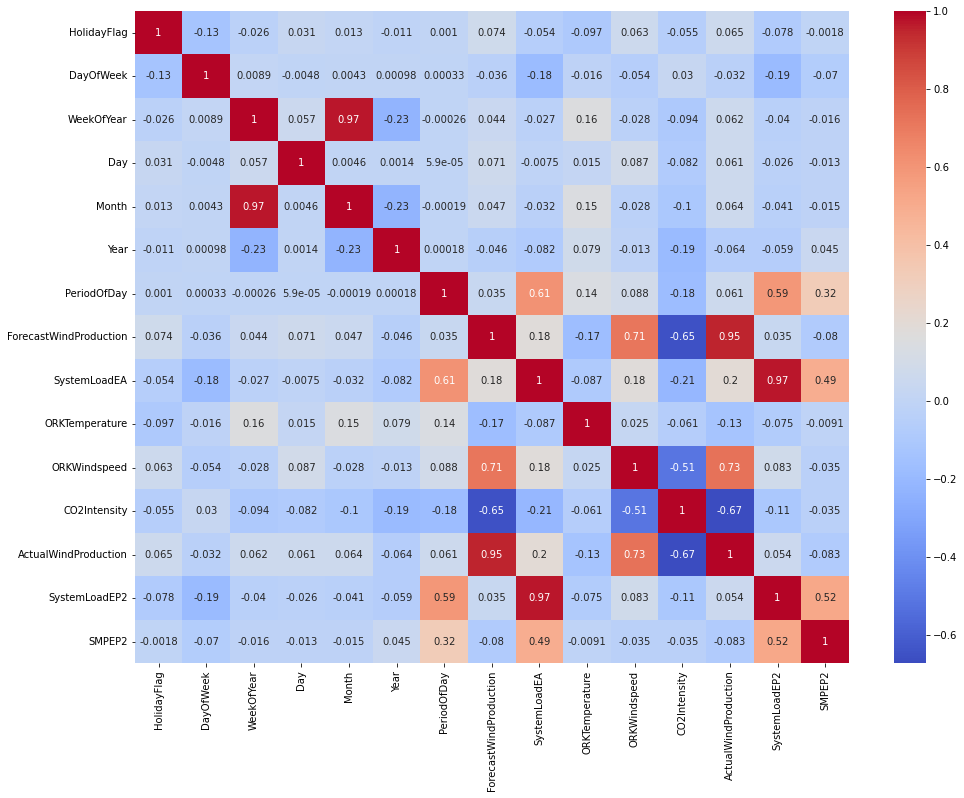

In [20]:
correlations = data.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [21]:
X = data[["Day", "Month", "ForecastWindProduction", "SystemLoadEA", 
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", 
          "ActualWindProduction", "SystemLoadEP2"]]
y = data["SMPEP2"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

As this is the problem of regression, so here I will choose the Random Forest regression algorithm to train the electricity price prediction model:

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
model = RandomForestRegressor()

In [26]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [29]:
y_pred = model.predict(X_test)

In [36]:
#features = [["Day", "Month", "ForecastWindProduction", "SystemLoadEA", "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", "ActualWindProduction", "SystemLoadEP2"]]
features = np.array([[10, 12, 54.10, 4241.05, 49.56, 9.0, 14.8, 491.32, 54.0, 4426.84]])
model.predict(features)

array([69.8141])